    1. Reading understanding and visualising the data
    2. Preparing the data for modelling(train-test split,rescaling etc.)
    3. Training the model
    4. Model Evaluation
    5. Plotting ROC Curve

# step 1. Reading and understanding data

In [1]:
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Check the dataset
leads.shape

(9240, 37)

### Data Cleaning

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### So we can as per above there are to many missing values in the dataset

In [6]:
 (leads.isna().sum() / len(leads)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#Now lets drop those columns which have more than 3000 missing values
def drop_columns_with_many_missing(df, threshold):
  
    return df.dropna(axis=1, thresh=len(df) - threshold)


leads = drop_columns_with_many_missing(leads, 3000)

In [9]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [11]:
#As it is of no use we can drop this also 
leads.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)

In [12]:
#As it contains maximum values as select so we can drop this also
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [13]:
#As prospect ID is also not needed to our calculation we drop this also
leads.drop(columns=['Prospect ID'], inplace=True)
leads.drop(columns=['Lead Number'], inplace=True)
leads.drop(columns=['Lead Profile'], inplace=True)

In [14]:
leads.isna().sum()

Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

In [15]:
for i in  leads.columns:
    print(leads.value_counts(i,dropna=False))

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
dtype: int64
Do Not Email
No     8506
Yes     734
dtype: int64
Do Not Call
No     9238
Yes       2
dtype: int64
Converted
0    5679
1    3561
dtype: int64
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0     

In [16]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
cols=['Country','How did you hear about X Education']
leads.drop(cols, axis=1, inplace=True)


In [18]:
#As this column yes contains max to max 10 yes values so it will be good to drop them 
columns_less_than_10_yes = [
    'Do Not Call',
    'Search',
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque',
    
]

leads.drop(columns_less_than_10_yes,axis=1,inplace=True)

In [19]:

leads=leads[~leads['Lead Source'].isna()]
leads=leads[~leads['TotalVisits'].isna()]
leads=leads[~leads['Page Views Per Visit'].isna()]
leads=leads[~leads['Last Activity'].isna()]

In [20]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          7643 non-null   object 
 9   What is your current occupation         6391 non-null   object 
 10  City                                    7655 non-null   obje

## Data Visualization

### Bivariate Analysis

#### Lead Source vs Converted

In [21]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [22]:
leads['Lead Source']=leads['Lead Source'].replace('google','Google')
leads['Lead Source']=leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source']=leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                   'Live Chat','Pay per Click Ads','NC_EDM','blog','WeLearn','teston'
                                                  'youtubechannel','welearnblog_Home'],'other')



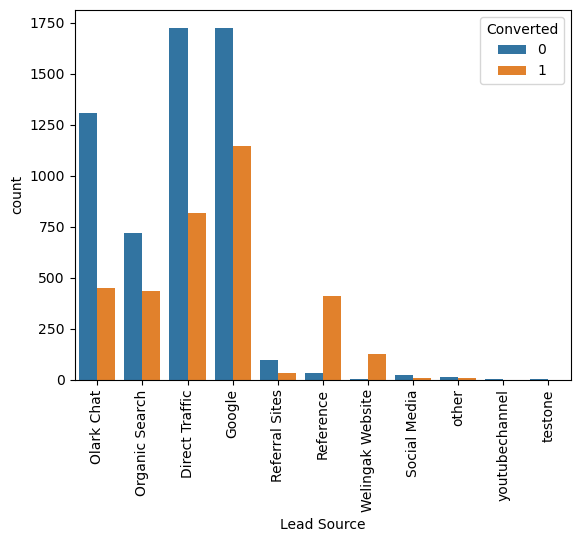

In [23]:
sns.countplot(data=leads, x='Lead Source', hue='Converted')
plt.xticks(rotation=90)
plt.show()

#### Insight:-
- Maximum lead is from google and direct traffic
- Conversion rate for welingak and reference website is high
- Need to improve olark chat, organice search and google lead

#### Specialization vs converted 

In [24]:
leads['Specialization'].value_counts(dropna=False)

Select                               1851
NaN                                  1431
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
leads['Specialization']=leads['Specialization'].replace(np.nan,'not mentioned')

In [26]:
l1=['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
leads['Specialization']=leads['Specialization'].replace(l1,'management')

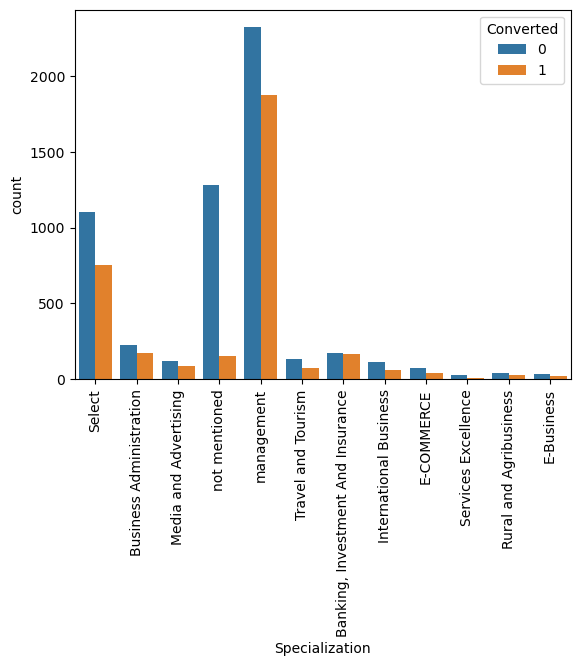

In [27]:
sns.countplot(data=leads, x='Specialization', hue='Converted')
plt.xticks(rotation=90)
plt.show()

##### Insight :
- Maximum lead is generated from management course
- Conversion rate for other courses is good for buisness administration and banking 

#### Occupation vs converted

In [28]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5476
NaN                     2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#Lets bin nan with not mentioned
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'not mentioned')

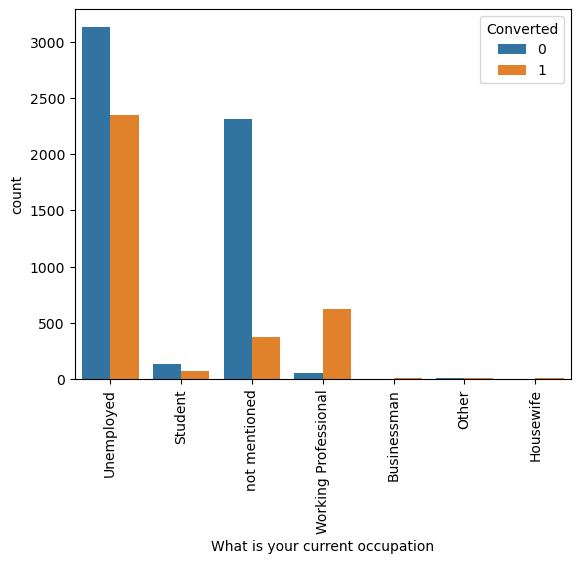

In [30]:
sns.countplot(data=leads, x='What is your current occupation', hue='Converted')
plt.xticks(rotation=90)
plt.show()

###  Insight:- 
- Conversion rate is higher for working professional 
- Need to improve student leads

#### City vs converted

In [31]:
leads['City'].value_counts(dropna=False)

Mumbai                         3177
Select                         2156
NaN                            1419
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
leads['City']=leads['City'].replace(np.nan,'not mentioned')

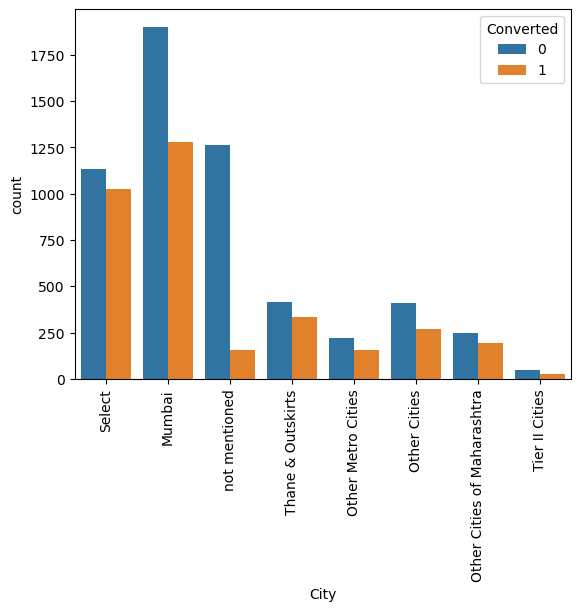

In [33]:
sns.countplot(data=leads, x='City', hue='Converted')
plt.xticks(rotation=90)
plt.show()

#### Insight :
- Maximum leads are from mumbai
- Need to improve leads from other cities and conversion rate should be improved from mumbai

#### Last Activity vs Converted 

In [34]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
leads['Last Activity']=leads['Last Activity'].replace([
    'Unreachable',
    'Unsubscribed',
    'Had a Phone Conversation',
    'Approached upfront',
    'View in browser link Clicked',
    'Email Received',
    'Email Marked Spam',
    'Visited Booth in Tradeshow',
    'Resubscribed to emails'
],'others')

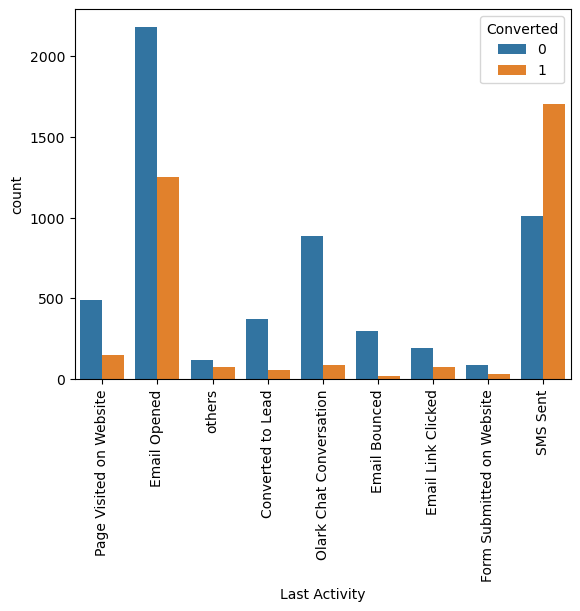

In [36]:
sns.countplot(data=leads, x='Last Activity', hue='Converted')
plt.xticks(rotation=90)
plt.show()

### Insight :
- Conversion rate is higher sms sent
- Highest lead is generated by email opened and olark chat conversation

#### Lead origin vs converted 

In [37]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

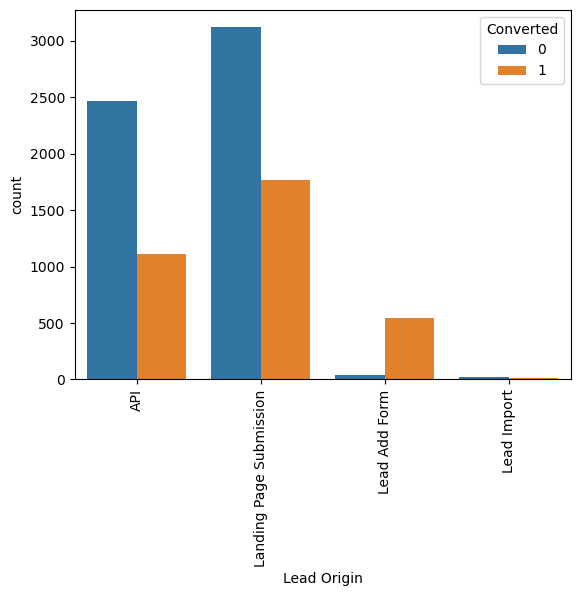

In [38]:
sns.countplot(data=leads, x='Lead Origin', hue='Converted')
plt.xticks(rotation=90)
plt.show()

#### Insight: 
- High lead is generated from API & Landing page submission
- Lead add form have good conversion rate
- In order to improve overaall lead conversion rate we have to improve lead conversion from API and Landing Page submission
- Need to improve Lead add form and lead import

##### Do not Email vs Converted 

In [39]:
leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

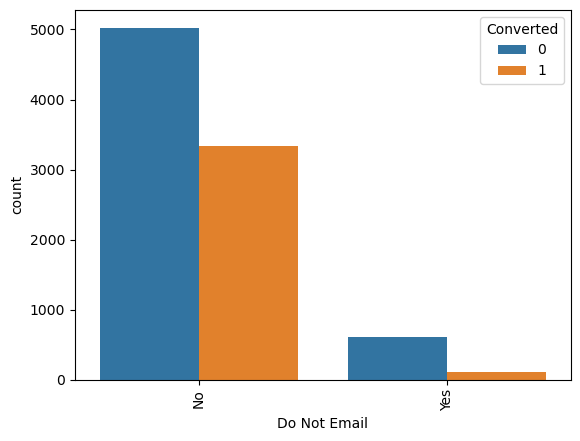

In [40]:
sns.countplot(data=leads, x='Do Not Email', hue='Converted')
plt.xticks(rotation=90)
plt.show()

#### Last Notable Activity vs Converted 

In [41]:
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

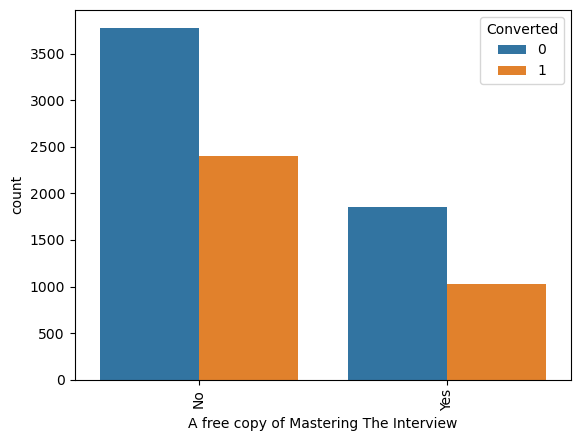

In [42]:
sns.countplot(data=leads, x='A free copy of Mastering The Interview', hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [43]:
leads.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

We are removing these columns as it will not affect our calculation the columns are 
'What is your current occupation', 'Lead Profile', 'Lead Source', 'TotalVisits', 'Page Views Per Visit', and 'Last Activity

In [44]:
leads.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

As we can see from above values there are some columns which contain maximum number of no 


we can remove those as it will not affect our calculation much |

In [45]:
leads.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [46]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,others,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,No,Modified


In [47]:
#As it is city cols contains select and it is of no use
leads.drop('City',axis=1,inplace=True)

## Multivariate Analysis

<Axes: >

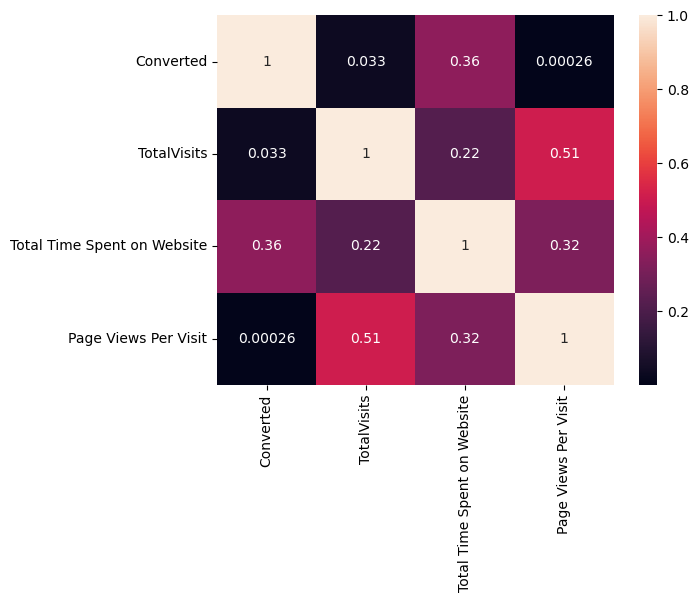

In [48]:
sns.heatmap(leads.corr(),annot=True)

In [49]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,others,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


THere is no such corr has been found

In [50]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,others,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Dummy Variables

In [52]:
col=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']
dummy = pd.get_dummies(leads[col], drop_first=True)


leads = pd.concat([leads, dummy], axis=1)

#### Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we so that's why we are droping that level by specifying it explicitly

In [53]:

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)


In [54]:

leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1,inplace=True)

In [55]:
leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_management,Specialization_not mentioned
0,0,0.0,0,0.00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9238,1,3.0,499,3.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Step 3.Train Test Split

In [56]:
X=leads.drop(["Converted"],axis=1)
y=leads['Converted']

In [57]:
#train test split
X_train, X_test ,y_train ,y_test=train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Feature scalling

In [58]:
X_train.head()
pd.set_option('display.max_columns', None)
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_other,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not mentioned,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_management,Specialization_not mentioned
3009,2.0,397,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,2.0,190,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,2.0,1380,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7987,5.0,1584,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [59]:

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
pd.set_option('display.max_columns', None)
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_other,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not mentioned,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_management,Specialization_not mentioned
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_other,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not mentioned,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_management,Specialization_not mentioned
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
X_train.shape

(6351, 58)

#### Feature Selection Using RFE

In [62]:
#Instantiate Object
logreg=LogisticRegression()


In [63]:
#rfe
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [64]:
rfe.support_

array([ True,  True, False, False,  True, False, False,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_other', False, 29),
 ('Lead Source_testone', False, 37),
 ('Lead Source_youtubechannel', False, 41),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 33),
 ('Last Activity_Email Link Clicked', False, 25),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Olark Chat Conversation', False, 23),
 ('Last Activity_Page Visited on Website', False, 10),
 ('Last Activity_SMS S

In [66]:
col=X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent', 'Last Activity_others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not mentioned',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_other', 'Lead Source_testone',
       'Lead Source_youtubechannel', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activ

In [68]:
#Subsetting the columns
X_train_rfe=X_train[col]

#Add constant 
X_train_sm=sm.add_constant(X_train_rfe)


logm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.8
Date:                Wed, 20 Mar 2024   Deviance:                       5237.6
Time:                        10:47:13   Pearson chi2:                 6.27e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3985
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4462      0.086    -28.502      0.000      -2.614      -2.278
TotalVisits                                              8.3547      2.047      4.082      0.000       4.343      12.366
Total Time Spent on Website                              4.6901      0.168     27.975      0.000       4.362       5.019
Lead Origin_Lead Add Form                                2.1727      0.928      2.342      0.019       0.354       3.991
Lead Source_Olark Chat                                   1.4316      0.109     13.127      0.000       1.218       1.645
Lead Source_Reference                                    1.7414      0.951      1.830      0.067      -0.123       3.606
Lead Source_Social Media                                 1.3342      0.451      2.959      0.003       0.451       2.218
Lead Source_Welingak Website                             3.6757      1.175      3.129      0.002       1.374       5.978
Do Not Email_Yes                                        -1.7161      0.178     -9.662      0.000      -2.064      -1.368
Last Activity_SMS Sent                                   1.4638      0.075     19.601      0.000       1.317       1.610
Last Activity_others                                     0.9452      0.232      4.073      0.000       0.490       1.400
What is your current occupation_Housewife               22.9053   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Working Professional     2.4889      0.185     13.444      0.000       2.126       2.852
What is your current occupation_not mentioned           -1.3113      0.088    -14.945      0.000      -1.483      -1.139
Last Notable Activity_Had a Phone Conversation           2.8097      1.147      2.450      0.014       0.562       5.057
Last Notable Activity_Olark Chat Conversation           -0.8346      0.333     -2.504      0.012      -1.488      -0.181
========================================================================================================================
"""

In [69]:
#Lets check VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,58.16
5,Lead Source_Reference,45.59
7,Lead Source_Welingak Website,15.22
0,const,5.12
4,Lead Source_Olark Chat,1.39
2,Total Time Spent on Website,1.32
1,TotalVisits,1.15
10,Last Activity_others,1.13
13,What is your current occupation_not mentioned,1.13
12,What is your current occupation_Working Profes...,1.11


In [70]:
# Now lets drop the high p value varaible Last Notable Activity_Had a Phone Conversation
X_train_sm.drop('Lead Source_Reference',axis=1,inplace=True)

In [71]:
#lets refit the model
#Add constant 
X_train_sm=sm.add_constant(X_train_sm)


logm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.2
Date:                Wed, 20 Mar 2024   Deviance:                       5240.3
Time:                        10:47:13   Pearson chi2:                 6.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3983
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4450      0.086    -28.493      0.000      -2.613      -2.277
TotalVisits                                              8.3357      2.046      4.074      0.000       4.326      12.345
Total Time Spent on Website                              4.6872      0.168     27.958      0.000       4.359       5.016
Lead Origin_Lead Add Form                                3.8472      0.224     17.144      0.000       3.407       4.287
Lead Source_Olark Chat                                   1.4289      0.109     13.097      0.000       1.215       1.643
Lead Source_Social Media                                 1.3330      0.451      2.956      0.003       0.449       2.217
Lead Source_Welingak Website                             1.9993      0.752      2.658      0.008       0.525       3.473
Do Not Email_Yes                                        -1.7127      0.177     -9.659      0.000      -2.060      -1.365
Last Activity_SMS Sent                                   1.4638      0.075     19.607      0.000       1.318       1.610
Last Activity_others                                     0.9457      0.232      4.077      0.000       0.491       1.400
What is your current occupation_Housewife               22.9122   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
What is your current occupation_Working Professional     2.4910      0.185     13.463      0.000       2.128       2.854
What is your current occupation_not mentioned           -1.3108      0.088    -14.941      0.000      -1.483      -1.139
Last Notable Activity_Had a Phone Conversation           2.8086      1.147      2.449      0.014       0.561       5.056
Last Notable Activity_Olark Chat Conversation           -0.8334      0.333     -2.501      0.012      -1.486      -0.180
========================================================================================================================
"""

In [72]:
#Now lets check vif again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.12
3,Lead Origin_Lead Add Form,1.57
4,Lead Source_Olark Chat,1.39
2,Total Time Spent on Website,1.32
6,Lead Source_Welingak Website,1.31
1,TotalVisits,1.15
9,Last Activity_others,1.13
12,What is your current occupation_not mentioned,1.13
11,What is your current occupation_Working Profes...,1.11
8,Last Activity_SMS Sent,1.09


In [73]:
#NOw as What is your current occupation_Working Professional high vif and high p-values lets drop it
X_train_sm.drop('What is your current occupation_Housewife',axis=1,inplace=True)

In [74]:
#Lets refit model again
#Add constant 
X_train_sm=sm.add_constant(X_train_sm)


logm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.9
Date:                Wed, 20 Mar 2024   Deviance:                       5249.8
Time:                        10:47:14   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4370      0.086    -28.459      0.000      -2.605      -2.269
TotalVisits                                              8.2843      2.042      4.057      0.000       4.282      12.287
Total Time Spent on Website                              4.6854      0.167     27.980      0.000       4.357       5.014
Lead Origin_Lead Add Form                                3.8660      0.224     17.256      0.000       3.427       4.305
Lead Source_Olark Chat                                   1.4238      0.109     13.064      0.000       1.210       1.637
Lead Source_Social Media                                 1.3269      0.451      2.944      0.003       0.444       2.210
Lead Source_Welingak Website                             1.9750      0.752      2.626      0.009       0.501       3.449
Do Not Email_Yes                                        -1.7151      0.177     -9.672      0.000      -2.063      -1.368
Last Activity_SMS Sent                                   1.4583      0.075     19.546      0.000       1.312       1.605
Last Activity_others                                     0.9405      0.232      4.055      0.000       0.486       1.395
What is your current occupation_Working Professional     2.4857      0.185     13.436      0.000       2.123       2.848
What is your current occupation_not mentioned           -1.3138      0.088    -14.982      0.000      -1.486      -1.142
Last Notable Activity_Had a Phone Conversation           2.8080      1.147      2.449      0.014       0.560       5.056
Last Notable Activity_Olark Chat Conversation           -0.8361      0.333     -2.510      0.012      -1.489      -0.183
========================================================================================================================
"""

In [75]:
#Now lets check vif again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.12
3,Lead Origin_Lead Add Form,1.56
4,Lead Source_Olark Chat,1.39
2,Total Time Spent on Website,1.32
6,Lead Source_Welingak Website,1.31
1,TotalVisits,1.15
9,Last Activity_others,1.13
11,What is your current occupation_not mentioned,1.13
10,What is your current occupation_Working Profes...,1.11
8,Last Activity_SMS Sent,1.09


We are good to go from here


# Step 4.Model Evaluation

In [76]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)


In [77]:
y_train_pred[:10]

array([0.05472247, 0.23138378, 0.60947969, 0.66333645, 0.92556011,
       0.77285322, 0.02549606, 0.92099308, 0.86891296, 0.90363389])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [78]:
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,'converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,converted_prob
0,0,0.054722
1,0,0.231384
2,0,0.609480
3,1,0.663336
4,1,0.925560


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [79]:
y_train_pred_final['pred_converted']=y_train_pred_final.converted_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,converted_prob,pred_converted
0,0,0.054722,0
1,0,0.231384,0
2,0,0.609480,1
3,1,0.663336,1
4,1,0.925560,1


In [80]:
#Lets check confusion matrix


# Then use it in your code
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.pred_converted)
confusion

array([[3452,  453],
       [ 748, 1698]], dtype=int64)

In [81]:
#Lets check accuracy
accuracy_score(y_train_pred_final.Converted,y_train_pred_final.pred_converted)

0.8108959219020627

#### Metrics beyond simple accuracy


In [82]:
TP=confusion[1,1] #True Positives
TN=confusion[0,0] #True Negatives
FP=confusion[0,1] #False Positives
FN=confusion[1,0] #False Negatives

In [83]:
#Sesitivity 
sensitivity=TP/float(TP+FN)

#Specificity 
specificity=TN/float(TN+FP)

print("sensitivity is ", sensitivity)
print("specificity is ", specificity)

sensitivity is  0.6941946034341783
specificity is  0.8839948783610756


In [84]:
# Caculate the false positive rate -Prediciting converted when customers does not have converted 
FP_rate=FP/float(TN+FP)

#To calculate the true positive rate when predicting converted in customers who do not have conver
TP_rate=TP/float(TP+FP)

print(f"False positive rate is {FP_rate}")
print(f"True positive rate is {TP_rate}")

False positive rate is 0.11600512163892446
True positive rate is 0.7894002789400278


So your model seems to have **high accuracy (~79%)** and **high specificity (~82.96%)**, but **low sensitivity (~73.93%)**

# Step 5. Plotting ROC Curve

In [85]:

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [86]:
fpr ,tpr , thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.converted_prob,drop_intermediate=False)

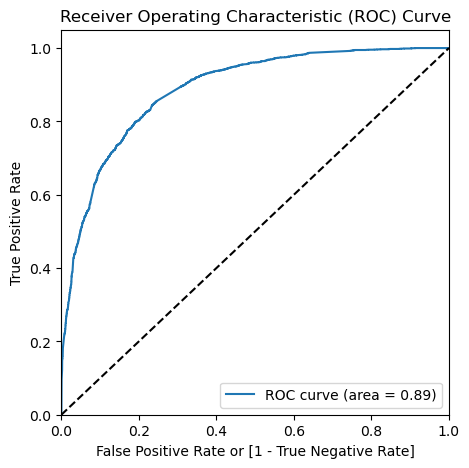

In [87]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.converted_prob)

# Step 6.Optimal Cutt-off point

In [88]:
#lets create cols with diff prob cuttoffs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.converted_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,converted_prob,pred_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.054722,0,1,0,0,0,0,0,0,0,0,0
1,0,0.231384,0,1,1,1,0,0,0,0,0,0,0
2,0,0.609480,1,1,1,1,1,1,1,1,0,0,0
3,1,0.663336,1,1,1,1,1,1,1,1,0,0,0
4,1,0.925560,1,1,1,1,1,1,1,1,1,1,1


In [89]:
#Lets calculate accuracy specificity and sensitivity for different probability cutoff
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
for i in numbers:
    cml=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1=sum(sum(cml))
    speci=cml[0,0]/(cml[0,0]+cml[0,1])
    sensi=cml[1,1]/(cml[1,0]+cml[1,1])
    accuracy=(cml[0,0]+cml[1,1])/total1
    cutoff_df.loc[i]=[i,accuracy,speci,sensi]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  0.000000  1.000000
0.1   0.1  0.623524  0.400768  0.979150
0.2   0.2  0.752480  0.646863  0.921096
0.3   0.3  0.795150  0.773624  0.829518
0.4   0.4  0.806960  0.834571  0.762878
0.5   0.5  0.810896  0.883995  0.694195
0.6   0.6  0.804913  0.914469  0.630008
0.7   0.7  0.781294  0.946479  0.517580
0.8   0.8  0.762242  0.966709  0.435814
0.9   0.9  0.713431  0.985659  0.278823


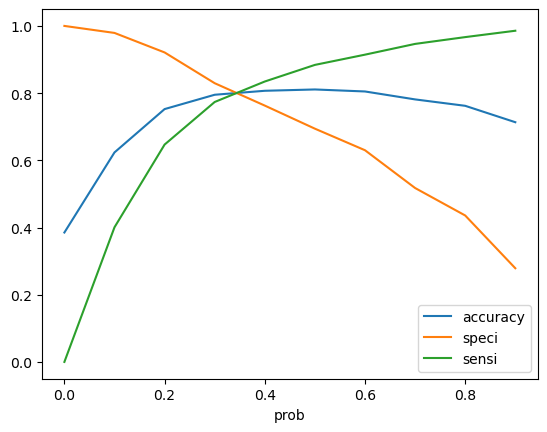

In [90]:
cutoff_df.plot.line(x='prob',y=['accuracy','speci','sensi'])
plt.show()

### From above 0.4 is optimal cutoff

In [91]:
y_train_pred_final['final_pred_converted']=y_train_pred_final.converted_prob.map(lambda x:1 if x>0.25 else 0)
y_train_pred_final.head()

,Converted,converted_prob,pred_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred_converted
0,0,0.054722,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.231384,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.609480,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.663336,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.925560,1,1,1,1,1,1,1,1,1,1,1,1


In [92]:
#Lets check accuracy score again
accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_pred_converted)

0.7671232876712328

In [93]:

confusion2=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_pred_converted)
confusion2


array([[2676, 1229],
       [ 250, 2196]], dtype=int64)

In [94]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [95]:
# Lets check sensi and speci
sensitivity=TP/float(TP+FN)

specificity=TN/float(TN+FP)

print(f"Sensitivity is {sensitivity} and specificity is {specificity}")

Sensitivity is 0.8977923139820114 and specificity is 0.6852752880921895


In [96]:
#Lets calculate Precision and recall
precision=TP/float(TP+FP)

#recall
recall=TP/float(TP+FN)
print(f"Precision is {precision} and recall is {recall}")

Precision is 0.6411678832116788 and recall is 0.8977923139820114


In [97]:
# Caculate the false positive rate -Prediciting converted when customers does not have converted 
FP_rate=FP/float(TN+FP)

#To calculate the true positive rate when predicting converted in customers who do not have conver
TP_rate=TP/float(TP+FP)

print(f"False positive rate is {FP_rate}")
print(f"True positive rate is {TP_rate}")

False positive rate is 0.3147247119078105
True positive rate is 0.6411678832116788


##### Precision and recall tradeoff


In [98]:
from sklearn.metrics import precision_recall_curve


In [99]:
y_train_pred_final.Converted,y_train_pred_final.final_pred_converted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: final_pred_converted, Length: 6351, dtype: int64)

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.converted_prob)

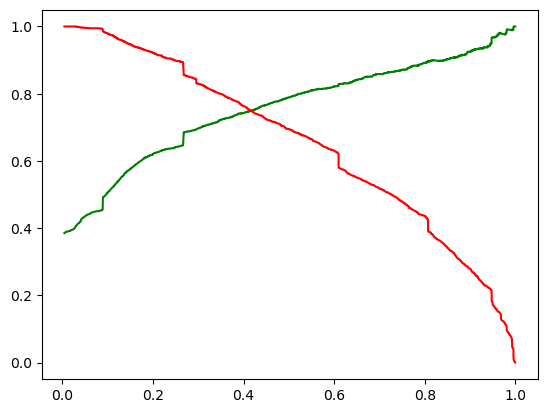

In [101]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

# Step 7.Make predictions on test set

In [102]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [103]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Last Activity_others,What is your current occupation_Housewife,What is your current occupation_Working Professional,What is your current occupation_not mentioned,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation
3271,0.015936,0.070530,0,0,0,0,0,0,0,0,0,0,1,0,0
1490,0.019920,0.679695,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0.007968,0.033243,0,0,0,0,0,0,0,0,0,0,1,0,0
4216,0.000000,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0
3830,0.031873,0.073675,0,0,0,0,0,0,0,0,0,0,1,0,0


In [104]:
#lets drop those cols which we previously drop while training the model because i has high vif and p values
cols1=['What is your current occupation_Housewife','Lead Source_Reference']
X_test.drop(cols1,axis=1,inplace=True)

In [105]:
# add constant 
X_test_sm=sm.add_constant(X_test)

In [106]:
y_test_pred=res.predict(X_test_sm)

In [107]:
y_test_pred[:10]

3271    0.035973
1490    0.967652
7936    0.028496
4216    0.806746
3830    0.041423
1800    0.600284
6507    0.352479
4821    0.281807
4223    0.947217
4714    0.295529
dtype: float64

In [108]:
#Convert array to df
y_pred_1=pd.DataFrame(y_test_pred)
y_pred_1

,0
3271,0.035973
1490,0.967652
7936,0.028496
4216,0.806746
3830,0.041423
...,...
850,0.129329
2879,0.243927
6501,0.890447
7155,0.071238


In [109]:
y_test_df=pd.DataFrame(y_test)
y_test_df

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0
...,...
850,0
2879,0
6501,1
7155,0


In [110]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
#Appending y_test_df to y_pred_1.
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.035973
1,1,0.967652
2,0,0.028496
3,1,0.806746
4,0,0.041423


In [112]:
#Rename the col
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Converted_prob
0,0,0.035973
1,1,0.967652
2,0,0.028496
3,1,0.806746
4,0,0.041423


In [113]:
#Add final predictions
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Converted,Converted_prob,final_predicted
0,0,0.035973,0
1,1,0.967652,1
2,0,0.028496,0
3,1,0.806746,1
4,0,0.041423,0


In [114]:
##Now lets check accuracy score

accuracy =metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)
print(f"Accuracy is {accuracy}")

Accuracy is 0.7568857877341167


In [115]:
#confusion metrics
confusion3=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
confusion3

array([[1186,  548],
       [ 114,  875]], dtype=int64)

In [116]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [117]:
#Now lets check sensi and speci of our model
sensitivity=TP/float(TP+FN)

#specificity
specificity=TN/float(TN+FP)

print(f"Sensitivity of test model is {sensitivity} and specificity is {specificity}")

Sensitivity of test model is 0.884732052578362 and specificity is 0.6839677047289504


In [118]:
#Lets calculate Precision and recall
precision=TP/float(TP+FP)

#recall
recall=TP/float(TP+FN)
print(f"Precision is {precision} and recall is {recall}")                                        

Precision is 0.6148981026001406 and recall is 0.884732052578362


In [119]:
filtered_df = y_pred_final[y_pred_final['Converted_prob'] > 0.95]
filtered_df

,Converted,Converted_prob,final_predicted
1,1,0.967652,1
21,1,0.992327,1
23,1,0.995381,1
25,1,0.995381,1
30,1,0.970196,1
...,...,...,...
2666,1,0.967829,1
2678,1,0.971272,1
2684,0,0.956667,1
2686,1,0.995381,1
